# SGD Implementation On Boston Housing Dataset

# About the dataset

Data Set Characteristics:

:Number of Instances: 506 

:Number of Attributes: 13 numeric/categorical predictive

:Median Value (attribute 14) is usually the target

:Attribute Information (in order):

    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
   
    - PTRATIO   Pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

:Missing Attribute Values: None

:Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset. http://archive.ics.uci.edu/ml/datasets/Housing

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978. Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980. N.B. Various transformations are used in the table on pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression problems.

References

Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
many more! (see http://archive.ics.uci.edu/ml/datasets/Housing)

# Objective

Implement stochastic gradient descent from scratch and comapre its perfomance with sgd of sklearn using boston dataset

# Data Preprocessing

In [207]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Loading Boston dataset
from sklearn.datasets import load_boston
boston_dt = load_boston()

In [19]:
print(boston_dt.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [24]:
#converting data to a dataframe
boston_data = pd.DataFrame(data=boston_dt.data,columns=boston_dt.feature_names)
price = boston_dt.target

In [25]:
#printing head of dataframe
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [271]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(boston_data, price, test_size=0.33)

In [272]:
# applying column standardization on train and test data
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [273]:
#creating a dataframe out of test data
X = np.hstack((X_train,y_train.reshape(-1,1)))
X_tr = pd.DataFrame(X,columns=['CRIM' ,'ZN' ,'INDUS', 'CHAS', 'NOX' ,'RM' ,'AGE' ,'DIS', 'RAD', 'TAX' ,'PTRATIO','B' ,'LSTAT','Price'])

In [274]:
X_tr.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.414026,-0.477878,-0.199145,-0.256978,0.271047,-1.274391,0.159198,-0.489280,-0.404416,-0.100689,0.327953,0.445035,1.165992,19.7
1,-0.345446,-0.477878,-0.427822,-0.256978,-0.138364,-0.412282,0.473444,0.197856,-0.635804,-0.605217,1.185721,0.332307,0.261689,17.5
2,-0.449964,-0.477878,-0.863047,-0.256978,-0.338715,-0.548783,-0.315741,0.836871,-0.520110,-1.103739,0.804491,0.421823,-0.312760,18.5
3,-0.261726,-0.477878,-0.427822,-0.256978,-0.138364,-0.469756,0.484156,0.071711,-0.635804,-0.605217,1.185721,-1.379720,2.084272,13.2
4,-0.422332,-0.477878,-0.066364,-0.256978,-0.565198,0.070499,-0.569280,0.243531,-0.635804,-0.785406,0.042031,0.422490,-0.255455,24.4


# Implemention of stochastic gradient descent [ Manual SGD ]

In [326]:
# this function returns weight (w) and bias (b)
# here we have taken sgd with batch size=15

#code written refering https://github.com/PushpendraSinghChauhan/SGD-Linear-Regression/blob/master/Implement%20Stochastic%20Gradient%20Descent%20on%20Linear%20Regression%20.ipynb

def s_g_d(data,  learning_rate=0.01, no_of_iterations=100):
    #Initialize first weight and bias
    w_final = np.zeros(shape=(1,13))
    w0_final = 0    #bias
    r = learning_rate    
    it=1
        
    while(it <= no_of_iterations):
        w_old = w_final
        w0_old = w0_final
        w = np.zeros(shape=(1,13))
        w0  = 0
        #we are taking sample of 15 datapoints  ie, k = 15
        x_data=data.sample(15)
        x=np.array(x_data.drop('Price',axis=1))
        y=np.array(x_data['Price'])
        
        """
        #this following part of code will  returns 
        ---                              ---
        \                                \
            xi (yi - ybar)      and        (yi- ybar)  
        /                                /
        ---                              ---
        """
        
        # for all sample points that we take(here 15)
        for i in range(15):  # 
           
            # here we are doing ybar = w^T * xi  + w0
            y_bar = np.dot(w_old,x[i]) + w0_old
            
            # here we are calculating wi = wi + xi(yi - ybar)
            w += x[i] * (y[i] - y_bar)
            
            #similarly  w0 = w0 + (yi - ybar)
            w0 += (y[i] - y_bar)
            
        
        """
        In following part we will multpliy
        ---                              ---
        \                                \                             - 2
            xi (yi - ybar)      and        (yi- ybar)      with        ---
        /                                /                              n
        ---                              ---
        
        """
        n = x.shape[0]  # taking length which is 15
        w *= (-2/n)
        w0 *= (-2/n)
        
        # now updating the parameters we get 
        w_final =  (w_old - r*w)
        w0_final =  (w0_old - r*w0)
        
        it += 1
        
        
        
    # returns output after all iterations
    return w_final, w0_final

###########################################################################################################
#prediction function for predicting test data using weight and bias we found
def prediction(data,w,w0):
    y_predicted = []
    length = len(data)
    for i in range(length):
        y_bar=np.asscalar(np.dot(w,data[i])+w0)
        y_predicted.append(y_bar)
    return np.array(y_predicted)



## SGD with learning rate = 0.01

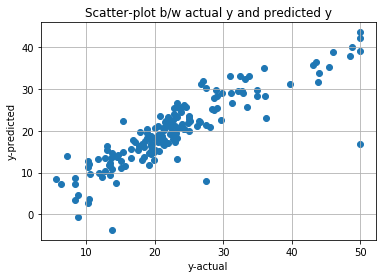

weights 
 [[-0.52925715 -0.01144495 -0.45592963  0.6710027  -0.6958361   3.66554124
  -0.41408999 -1.1017068   0.2460445  -0.72670831 -1.84412597  0.87074738
  -2.65576309]]
bias  [19.38325056]
MSE is 29.137148276015303


In [298]:
#getting weights and bias
weights,bias = s_g_d(data=X_tr,learning_rate=0.01)
y_prediction = prediction(X_test,weight,bias)
plt.scatter(y_test,y_prediction)
plt.grid()
plt.title('Scatter-plot b/w actual y and predicted y')
plt.xlabel('y-actual')
plt.ylabel('y-predicted')
plt.show()
print('weights \n {}'.format(weights))
print('bias  {}'.format(bias))
print('MSE is {}'.format(mean_squared_error(y_test,y_prediction)))

## SGD with learning rate = 0.1

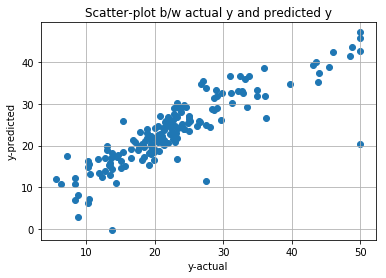

weights 
 [[ 0.0781263   0.97089098  0.07930509  1.33499147 -2.31168222  2.29460524
  -0.70298685 -2.29590343  1.48210563 -1.34446774 -2.26866395  0.93740996
  -1.9535583 ]]
bias  [22.93417847]
MSE is 21.813236188543396


In [303]:
#getting weights and bias
weights,bias = s_g_d(data=X_tr,learning_rate=0.1)
y_prediction = prediction(X_test,weight,bias)
plt.scatter(y_test,y_prediction)
plt.grid()
plt.title('Scatter-plot b/w actual y and predicted y')
plt.xlabel('y-actual')
plt.ylabel('y-predicted')
plt.show()
print('weights \n {}'.format(weights))
print('bias  {}'.format(bias))
print('MSE is {}'.format(mean_squared_error(y_test,y_prediction)))

## SGD with learning rate = 0.125

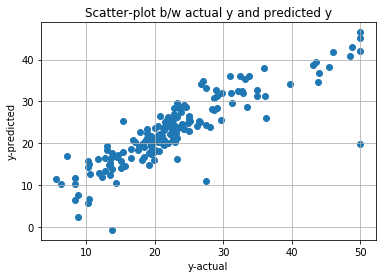

weights 
 [[-1.79749259  0.33704391 -1.01804609 -1.22067433 -2.88492757  2.17184532
   0.32799776 -3.13123707  1.38722807 -1.6402194  -3.08478438  0.26569978
  -2.30522273]]
bias  [22.33626209]
MSE is 21.28080551465867


In [321]:
#getting weights and bias
weights,bias = s_g_d(data=X_tr,learning_rate=0.125)
y_prediction = prediction(X_test,weight,bias)
plt.scatter(y_test,y_prediction)
plt.grid()
plt.title('Scatter-plot b/w actual y and predicted y')
plt.xlabel('y-actual')
plt.ylabel('y-predicted')
plt.show()
print('weights \n {}'.format(weights))
print('bias  {}'.format(bias))
print('MSE is {}'.format(mean_squared_error(y_test,y_prediction)))

## SGD with learning rate = 0.25

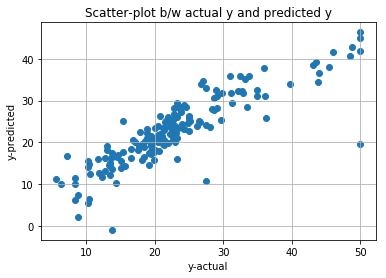

weights 
 [[-0.17663273 -0.07607747 -0.14946072  0.75626256 -0.86421356  3.25357126
   0.18711368 -2.20752117  1.20629736 -0.69238064 -1.95072148  0.85645742
  -3.18498149]]
bias  [22.15486132]
MSE is 21.26064106630606


In [304]:
#getting weights and bias
weights,bias = s_g_d(data=X_tr,learning_rate=0.025)
y_prediction = prediction(X_test,weight,bias)
plt.scatter(y_test,y_prediction)
plt.grid()
plt.title('Scatter-plot b/w actual y and predicted y')
plt.xlabel('y-actual')
plt.ylabel('y-predicted')
plt.show()
print('weights \n {}'.format(weights))
print('bias  {}'.format(bias))
print('MSE is {}'.format(mean_squared_error(y_test,y_prediction)))

## SGD With learning rate = 0.5

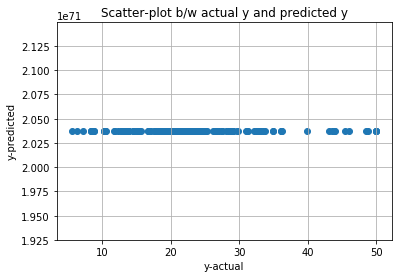

weights 
 [[ 5.05482300e+71 -6.68536081e+71  1.01820663e+72  2.77849551e+70
   9.47886610e+71  2.72250234e+71  4.93784441e+71 -8.66619753e+71
   1.10151916e+72  1.14005080e+72  7.41318415e+71  3.82643164e+71
   4.16999066e+71]]
bias  [2.03722725e+71]
MSE is 4.150294871786402e+142


In [308]:
#getting weights and bias
weights,bias = s_g_d(data=X_tr,learning_rate=0.5)
y_prediction = prediction(X_test,weight,bias)
plt.scatter(y_test,y_prediction)
plt.grid()
plt.title('Scatter-plot b/w actual y and predicted y')
plt.xlabel('y-actual')
plt.ylabel('y-predicted')
plt.show()
print('weights \n {}'.format(weights))
print('bias  {}'.format(bias))
print('MSE is {}'.format(mean_squared_error(y_test,y_prediction)))

## SGD with learning rate = 1

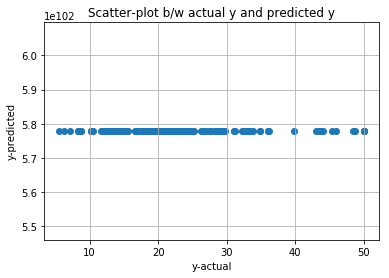

weights 
 [[ 2.70438883e+103 -6.29024854e+102  3.34674477e+103  8.28355336e+102
   2.28471359e+103 -2.13940026e+103  2.52342411e+103 -3.19393518e+103
   3.60600148e+103  3.40739554e+103  1.79148633e+103 -5.44445447e+103
   4.40441843e+103]]
bias  [5.77868292e+102]
MSE is 3.339317629359234e+205


In [301]:
#getting weights and bias
weights,bias = s_g_d(data=X_tr,learning_rate=1)
y_prediction = prediction(X_test,weight,bias)
plt.scatter(y_test,y_prediction)
plt.grid()
plt.title('Scatter-plot b/w actual y and predicted y')
plt.xlabel('y-actual')
plt.ylabel('y-predicted')
plt.show()
print('weights \n {}'.format(weights))
print('bias  {}'.format(bias))
print('MSE is {}'.format(mean_squared_error(y_test,y_prediction)))

# Using Sklear SGD Regressor

## Sklearn SGD with learning rate =0.01

C:\Users\opc\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


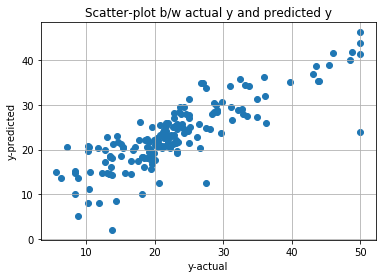

weights: 
 [-0.49424037  0.495052    0.68046927  0.99924773 -2.41277486  3.53073362
  0.23636625 -3.20710684  2.9028846  -1.50955253 -2.06598016  0.1740338
 -3.34539705]
MSE 26.46118264112982


In [310]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(penalty='none',learning_rate='constant' , eta0=0.01, max_iter=100)
reg.fit(X_train, y_train)
y_prediction = reg.predict(X_test)
plt.scatter(y_test,y_prediction)
plt.grid()
plt.title('Scatter-plot b/w actual y and predicted y')
plt.xlabel('y-actual')
plt.ylabel('y-predicted')
plt.show()
# Weights of Sklearn's SGD
sklearn_sgd_weights = reg.coef_
print('weights: \n {}'.format(sklearn_sgd_weights))
print('MSE {}'.format(mean_squared_error(y_test,y_prediction)))


## Sklearn SGD with learning rate = 0.1

C:\Users\opc\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


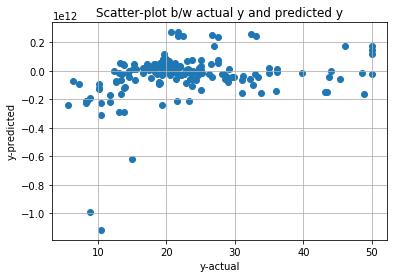

weights: 
 [-9.92794800e+10  2.01464923e+10  1.68063054e+10  5.92319504e+10
 -5.99396454e+10 -1.17647521e+10  2.26421900e+10 -2.82324082e+10
  5.40597024e+10 -7.01784732e+09  3.97628727e+10  2.25636005e+10
 -1.03912600e+10]
MSE 2.7514861972114786e+22


In [323]:
reg = SGDRegressor(penalty='none',learning_rate='constant' , eta0=0.1, max_iter=100)
reg.fit(X_train, y_train)
y_prediction = reg.predict(X_test)
plt.scatter(y_test,y_prediction)
plt.grid()
plt.title('Scatter-plot b/w actual y and predicted y')
plt.xlabel('y-actual')
plt.ylabel('y-predicted')
plt.show()
# Weights of Sklearn's SGD
sklearn_sgd_weights = reg.coef_
print('weights: \n {}'.format(sklearn_sgd_weights))
print('MSE {}'.format(mean_squared_error(y_test,y_prediction)))

## Sklearn SGD with learning rate =0.125

C:\Users\opc\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


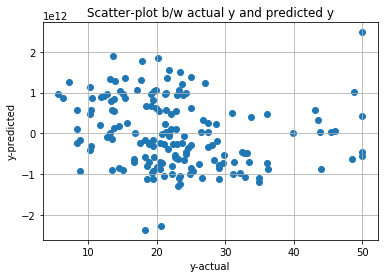

weights: 
 [-9.12844991e+10 -1.71451488e+11  4.36643656e+11  4.87865529e+10
  1.03058352e+11  3.69099674e+11  7.47913937e+10 -8.22546398e+10
 -2.50720573e+10  3.78304561e+11 -1.84531303e+11  2.81349030e+11
  4.28640095e+10]
MSE 7.111392328710589e+23


In [319]:
reg = SGDRegressor(penalty='none',learning_rate='constant' , eta0=0.125, max_iter=100)
reg.fit(X_train, y_train)
y_prediction = reg.predict(X_test)
plt.scatter(y_test,y_prediction)
plt.grid()
plt.title('Scatter-plot b/w actual y and predicted y')
plt.xlabel('y-actual')
plt.ylabel('y-predicted')
plt.show()
# Weights of Sklearn's SGD
sklearn_sgd_weights = reg.coef_
print('weights: \n {}'.format(sklearn_sgd_weights))
print('MSE {}'.format(mean_squared_error(y_test,y_prediction)))

## Sklearn SGD with learning rate =0.25

C:\Users\opc\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


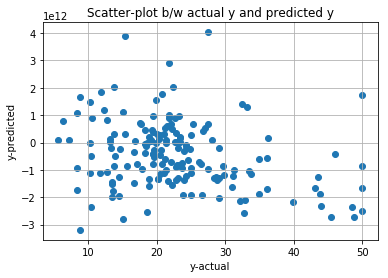

weights: 
 [-1.80041625e+11  1.13555516e+10 -9.55468918e+10  4.53398709e+11
  8.16983211e+11 -7.95839855e+11 -6.66078491e+11 -3.47544674e+11
  7.42925882e+11 -6.72327841e+11  2.98137384e+11  5.01748901e+11
 -1.50760143e+11]
MSE 1.6883562333823673e+24


In [318]:
reg = SGDRegressor(penalty='none',learning_rate='constant' , eta0=0.25, max_iter=100)
reg.fit(X_train, y_train)
y_prediction = reg.predict(X_test)
plt.scatter(y_test,y_prediction)
plt.grid()
plt.title('Scatter-plot b/w actual y and predicted y')
plt.xlabel('y-actual')
plt.ylabel('y-predicted')
plt.show()
# Weights of Sklearn's SGD
sklearn_sgd_weights = reg.coef_
print('weights: \n {}'.format(sklearn_sgd_weights))
print('MSE {}'.format(mean_squared_error(y_test,y_prediction)))

## Sklearn SGD with learning rate =0.5

C:\Users\opc\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


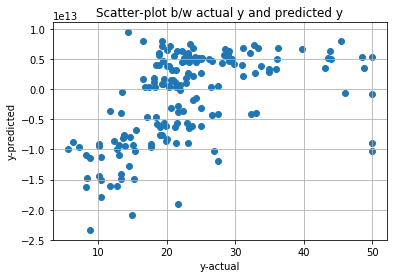

weights: 
 [-8.34087289e+11 -1.14944586e+12 -1.08312178e+12 -2.04036895e+12
 -2.36156608e+12  1.52107254e+11 -2.93473791e+11  5.89276943e+11
 -2.76241054e+11 -2.31446421e+12 -1.29486611e+12  1.72403328e+12
  9.39278551e+11]
MSE 5.64151157261051e+25


In [316]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(penalty='none',learning_rate='constant' , eta0=0.5, max_iter=100)
reg.fit(X_train, y_train)
y_prediction = reg.predict(X_test)
plt.scatter(y_test,y_prediction)
plt.grid()
plt.title('Scatter-plot b/w actual y and predicted y')
plt.xlabel('y-actual')
plt.ylabel('y-predicted')
plt.show()
# Weights of Sklearn's SGD
sklearn_sgd_weights = reg.coef_
print('weights: \n {}'.format(sklearn_sgd_weights))
print('MSE {}'.format(mean_squared_error(y_test,y_prediction)))


## Sklearn SGD with learning rate =1

C:\Users\opc\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


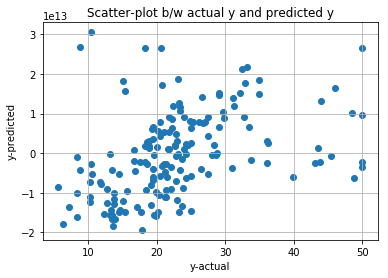

weights: 
 [ 4.45366352e+12  2.64896280e+12 -3.48433496e+12  3.43217406e+12
  2.07627534e+12 -3.82693643e+12 -1.18875494e+12  2.97146993e+12
 -3.05507399e+12 -1.13939634e+12  2.23499414e+11 -4.56769463e+11
 -4.04597576e+12]
MSE 1.157658399379422e+26


In [324]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(penalty='none',learning_rate='constant' , eta0=1, max_iter=100)
reg.fit(X_train, y_train)
y_prediction = reg.predict(X_test)
plt.scatter(y_test,y_prediction)
plt.grid()
plt.title('Scatter-plot b/w actual y and predicted y')
plt.xlabel('y-actual')
plt.ylabel('y-predicted')
plt.show()
# Weights of Sklearn's SGD
sklearn_sgd_weights = reg.coef_
print('weights: \n {}'.format(sklearn_sgd_weights))
print('MSE {}'.format(mean_squared_error(y_test,y_prediction)))


# Conclusion

In [1]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=['Learning rate','sgd_manual_mse','sklearn_sgd_mse']
x.add_row([0.01,29.137148276015303,26.46118264112982])
x.add_row([0.1,21.813236188543396,2.7514861972114786e+22])
x.add_row([0.125,21.28080551465867,7.111392328710589e+23])
x.add_row([0.25,21.26064106630606,1.6883562333823673e+24])
x.add_row([0.5,4.150294871786402e+142,5.64151157261051e+25])
x.add_row([1,3.339317629359234e+205,1.157658399379422e+26])
print(x)

+---------------+------------------------+------------------------+
| Learning rate |     sgd_manual_mse     |    sklearn_sgd_mse     |
+---------------+------------------------+------------------------+
|      0.01     |   29.137148276015303   |   26.46118264112982    |
|      0.1      |   21.813236188543396   | 2.7514861972114786e+22 |
|     0.125     |   21.28080551465867    | 7.111392328710589e+23  |
|      0.25     |   21.26064106630606    | 1.6883562333823673e+24 |
|      0.5      | 4.150294871786402e+142 |  5.64151157261051e+25  |
|       1       | 3.339317629359234e+205 | 1.157658399379422e+26  |
+---------------+------------------------+------------------------+


## Comparison of Weights 

### At learning rate 0.1

In [2]:
#The following table will print weights of our manual sgd and sklearn sgd at learning rate 0.1 
x=PrettyTable()
x.field_names=['sgd_manual_weights','sklearn_sgd_weights']
x.add_row([0.0781263,-9.92794800e+10]) 
x.add_row([0.97089098,2.01464923e+10])  
x.add_row([0.07930509,1.68063054e+10])
x.add_row([1.33499147,5.92319504e+10])
x.add_row([-2.31168222, -5.99396454e+10]) 
x.add_row([2.29460524,-1.17647521e+10])
x.add_row([-0.70298685 ,2.26421900e+10])
x.add_row([-2.29590343 , -2.82324082e+10])
x.add_row([1.48210563 ,5.40597024e+10])
x.add_row([-1.34446774 , -7.01784732e+09])
x.add_row([-2.26866395,3.97628727e+10])  
x.add_row([0.93740996,2.25636005e+10])
x.add_row([-1.9535583,-1.03912600e+10]) 
print(x)



+--------------------+---------------------+
| sgd_manual_weights | sklearn_sgd_weights |
+--------------------+---------------------+
|     0.0781263      |    -99279480000.0   |
|     0.97089098     |    20146492300.0    |
|     0.07930509     |    16806305400.0    |
|     1.33499147     |    59231950400.0    |
|    -2.31168222     |    -59939645400.0   |
|     2.29460524     |    -11764752100.0   |
|    -0.70298685     |    22642190000.0    |
|    -2.29590343     |    -28232408200.0   |
|     1.48210563     |    54059702400.0    |
|    -1.34446774     |    -7017847320.0    |
|    -2.26866395     |    39762872700.0    |
|     0.93740996     |    22563600500.0    |
|     -1.9535583     |    -10391260000.0   |
+--------------------+---------------------+


### At learning rate 0.5

In [10]:
x=PrettyTable()
x.field_names=['sgd_manual_weights','sklearn_sgd_weights']

x.add_row([5.05482300e+71,-8.34087289e+11])
x.add_row([-6.68536081e+71,-1.14944586e+12])  
x.add_row([1.01820663e+72,-1.08312178e+12])  
x.add_row([2.77849551e+70,-2.04036895e+12])
x.add_row([9.47886610e+71,-2.36156608e+12])
x.add_row([2.72250234e+71, 1.52107254e+11])
x.add_row([4.93784441e+71,-2.93473791e+11 ])
x.add_row([-8.66619753e+71,5.89276943e+11])
x.add_row([1.10151916e+72,-2.76241054e+11])
x.add_row([1.14005080e+72, -2.31446421e+12])
x.add_row([7.41318415e+71, -1.29486611e+12]) 
x.add_row([3.82643164e+71,1.72403328e+12])
x.add_row([4.16999066e+71,9.39278551e+11])
print(x)


+--------------------+---------------------+
| sgd_manual_weights | sklearn_sgd_weights |
+--------------------+---------------------+
|    5.054823e+71    |   -834087289000.0   |
|  -6.68536081e+71   |   -1149445860000.0  |
|   1.01820663e+72   |   -1083121780000.0  |
|   2.77849551e+70   |   -2040368950000.0  |
|   9.4788661e+71    |   -2361566080000.0  |
|   2.72250234e+71   |    152107254000.0   |
|   4.93784441e+71   |   -293473791000.0   |
|  -8.66619753e+71   |    589276943000.0   |
|   1.10151916e+72   |   -276241054000.0   |
|   1.1400508e+72    |   -2314464210000.0  |
|   7.41318415e+71   |   -1294866110000.0  |
|   3.82643164e+71   |   1724033280000.0   |
|   4.16999066e+71   |    939278551000.0   |
+--------------------+---------------------+


### At learning rate 1

In [15]:
x=PrettyTable()
col =['sgd_manual_weights','sklearn_sgd_weights']
x.add_column(col[0],[ 2.70438883e+103 ,-6.29024854e+102,  3.34674477e+103 , 8.28355336e+102,
   2.28471359e+103 ,-2.13940026e+103 , 2.52342411e+103, -3.19393518e+103,
   3.60600148e+103 , 3.40739554e+103 , 1.79148633e+103 ,-5.44445447e+103,
   4.40441843e+103])
x.add_column(col[1], [ 4.45366352e+12 , 2.64896280e+12 ,-3.48433496e+12,  3.43217406e+12,
  2.07627534e+12, -3.82693643e+12 ,-1.18875494e+12 , 2.97146993e+12,
 -3.05507399e+12 ,-1.13939634e+12 , 2.23499414e+11 ,-4.56769463e+11,
 -4.04597576e+12])
print(x)

+--------------------+---------------------+
| sgd_manual_weights | sklearn_sgd_weights |
+--------------------+---------------------+
|  2.70438883e+103   |   4453663520000.0   |
|  -6.29024854e+102  |   2648962800000.0   |
|  3.34674477e+103   |   -3484334960000.0  |
|  8.28355336e+102   |   3432174060000.0   |
|  2.28471359e+103   |   2076275340000.0   |
|  -2.13940026e+103  |   -3826936430000.0  |
|  2.52342411e+103   |   -1188754940000.0  |
|  -3.19393518e+103  |   2971469930000.0   |
|  3.60600148e+103   |   -3055073990000.0  |
|  3.40739554e+103   |   -1139396340000.0  |
|  1.79148633e+103   |    223499414000.0   |
|  -5.44445447e+103  |   -456769463000.0   |
|  4.40441843e+103   |   -4045975760000.0  |
+--------------------+---------------------+


*   Sklearn sgd is slightly better than or manual sgd
*    For lower values of learning rate our manual sgd is not as good as sklearn sgd